In [1]:
# Importing the required Libraries
import numpy as np 
import pandas as pd
import os 
import librosa 
import wave
import matplotlib.pyplot as plt 

# MLP Classifier
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
import tensorflow

#LSTM Classifier
import keras
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.optimizers import RMSprop
# from tensorflow.keras.optimizers import rmsprop

In [2]:
# Reading the dataset and feature Extraction
def extract_mfcc(wav_file_name):
    y, sr = librosa.load(wav_file_name,duration=3
                                  ,offset=0.5)
    mfccs = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T,axis=0)
    
    return mfccs

In [3]:
import os
radvess_speech_labels = []
ravdess_speech_data = []
path = '/Users/philipthapa/Desktop/Clustering-Based Speech Emotion Recognition by Incorporating Learned Features and Deep BiLSTM/dataset/audio_speech_actors_01-24/Actor_15/'
for dirname, _, filenames in os.walk(path):
# for dirname, _, filenames in os.walk('/kaggle/input/ravdess-emotional-speech-audio/'):
    for filename in filenames:
        radvess_speech_labels.append(int(filename[7:8]) - 1) 
        wav_file_name = os.path.join(dirname, filename)
        ravdess_speech_data.append(extract_mfcc(wav_file_name)) 
        
print("Finish Loading the Dataset")

Finish Loading the Dataset


In [4]:
# Preapring the dataset for ML model
ravdess_speech_data_array = np.asarray(ravdess_speech_data) 
ravdess_speech_label_array = np.array(radvess_speech_labels)
ravdess_speech_label_array.shape

labels_categorical = to_categorical(ravdess_speech_label_array) # converts a class vector (integers) to binary class matrix
labels_categorical.shape



(60, 8)

In [5]:
ravdess_speech_data_array.shape

(60, 40)

In [6]:
# Train and Test MLP Classifier
x_train,x_test,y_train,y_test= train_test_split(np.array(ravdess_speech_data_array),labels_categorical, test_size=0.20, random_state=9)

In [7]:
# Split the training, validating, and testing sets
number_of_samples = ravdess_speech_data_array.shape[0]
training_samples = int(number_of_samples * 0.8)
validation_samples = int(number_of_samples * 0.1)
test_samples = int(number_of_samples * 0.1)

In [8]:
# Define the BiLSTM model
def create_model_LSTM():
    model = Sequential()
    model.add(LSTM(128, return_sequences=False, input_shape=(40, 1)))
    model.add(Dense(64))
    model.add(Dropout(0.4))
    model.add(Activation('relu'))
    model.add(Dense(32))
    model.add(Dropout(0.4))
    model.add(Activation('relu'))
    model.add(Dense(8))
    model.add(Activation('softmax'))
    
    # Configures the model for training
    model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])
    return model

In [9]:
w = np.expand_dims(ravdess_speech_data_array[:training_samples],-1)

In [10]:
w.shape

(48, 40, 1)

In [11]:
### train using LSTM model
model_A = create_model_LSTM()
history = model_A.fit(np.expand_dims(ravdess_speech_data_array[:training_samples],-1), labels_categorical[:training_samples], validation_data=(np.expand_dims(ravdess_speech_data_array[training_samples:training_samples+validation_samples], -1), labels_categorical[training_samples:training_samples+validation_samples]), epochs=200, shuffle=True)

Epoch 1/200
2/2 [==============================] - 2s 403ms/step - loss: 2.1092 - accuracy: 0.0625 - val_loss: 2.0233 - val_accuracy: 0.3333
Epoch 2/200
2/2 [==============================] - 0s 33ms/step - loss: 2.0665 - accuracy: 0.1042 - val_loss: 1.9724 - val_accuracy: 0.3333
Epoch 3/200
2/2 [==============================] - 0s 33ms/step - loss: 2.0445 - accuracy: 0.1250 - val_loss: 1.9316 - val_accuracy: 0.3333
Epoch 4/200
2/2 [==============================] - 0s 32ms/step - loss: 2.0335 - accuracy: 0.2292 - val_loss: 1.8999 - val_accuracy: 0.3333
Epoch 5/200
2/2 [==============================] - 0s 33ms/step - loss: 2.0594 - accuracy: 0.1875 - val_loss: 1.8769 - val_accuracy: 0.3333
Epoch 6/200
2/2 [==============================] - 0s 34ms/step - loss: 1.9677 - accuracy: 0.1458 - val_loss: 1.8544 - val_accuracy: 0.3333
Epoch 7/200
2/2 [==============================] - 0s 34ms/step - loss: 2.0135 - accuracy: 0.1875 - val_loss: 1.8324 - val_accuracy: 0.3333
Epoch 8/200
2/2 [==

2/2 [==============================] - 0s 29ms/step - loss: 1.5799 - accuracy: 0.3958 - val_loss: 1.3657 - val_accuracy: 0.8333
Epoch 60/200
2/2 [==============================] - 0s 30ms/step - loss: 1.5381 - accuracy: 0.4375 - val_loss: 1.3728 - val_accuracy: 0.6667
Epoch 61/200
2/2 [==============================] - 0s 29ms/step - loss: 1.4924 - accuracy: 0.3750 - val_loss: 1.3643 - val_accuracy: 0.6667
Epoch 62/200
2/2 [==============================] - 0s 30ms/step - loss: 1.3823 - accuracy: 0.4375 - val_loss: 1.3328 - val_accuracy: 0.6667
Epoch 63/200
2/2 [==============================] - 0s 30ms/step - loss: 1.5275 - accuracy: 0.4167 - val_loss: 1.3073 - val_accuracy: 0.6667
Epoch 64/200
2/2 [==============================] - 0s 31ms/step - loss: 1.3998 - accuracy: 0.4375 - val_loss: 1.3281 - val_accuracy: 0.8333
Epoch 65/200
2/2 [==============================] - 0s 31ms/step - loss: 1.3956 - accuracy: 0.4375 - val_loss: 1.3519 - val_accuracy: 0.8333
Epoch 66/200
2/2 [========

2/2 [==============================] - 0s 30ms/step - loss: 1.0573 - accuracy: 0.6042 - val_loss: 1.0606 - val_accuracy: 0.5000
Epoch 118/200
2/2 [==============================] - 0s 30ms/step - loss: 1.1579 - accuracy: 0.5417 - val_loss: 0.9780 - val_accuracy: 0.6667
Epoch 119/200
2/2 [==============================] - 0s 30ms/step - loss: 0.9572 - accuracy: 0.6667 - val_loss: 0.9054 - val_accuracy: 0.6667
Epoch 120/200
2/2 [==============================] - 0s 30ms/step - loss: 1.0010 - accuracy: 0.6250 - val_loss: 0.9438 - val_accuracy: 0.6667
Epoch 121/200
2/2 [==============================] - 0s 30ms/step - loss: 1.0495 - accuracy: 0.5625 - val_loss: 1.0235 - val_accuracy: 0.6667
Epoch 122/200
2/2 [==============================] - 0s 31ms/step - loss: 1.0451 - accuracy: 0.5833 - val_loss: 1.3309 - val_accuracy: 0.5000
Epoch 123/200
2/2 [==============================] - 0s 30ms/step - loss: 1.1172 - accuracy: 0.5625 - val_loss: 1.1913 - val_accuracy: 0.6667
Epoch 124/200
2/2 [=

Epoch 175/200
2/2 [==============================] - 0s 41ms/step - loss: 0.6788 - accuracy: 0.7083 - val_loss: 1.9837 - val_accuracy: 0.5000
Epoch 176/200
2/2 [==============================] - 0s 39ms/step - loss: 0.4446 - accuracy: 0.8750 - val_loss: 2.0981 - val_accuracy: 0.5000
Epoch 177/200
2/2 [==============================] - 0s 36ms/step - loss: 0.7881 - accuracy: 0.7083 - val_loss: 1.9731 - val_accuracy: 0.3333
Epoch 178/200
2/2 [==============================] - 0s 36ms/step - loss: 0.5614 - accuracy: 0.7708 - val_loss: 1.6490 - val_accuracy: 0.6667
Epoch 179/200
2/2 [==============================] - 0s 56ms/step - loss: 0.8108 - accuracy: 0.7292 - val_loss: 1.5100 - val_accuracy: 0.5000
Epoch 180/200
2/2 [==============================] - 0s 36ms/step - loss: 0.6034 - accuracy: 0.7917 - val_loss: 1.5583 - val_accuracy: 0.5000
Epoch 181/200
2/2 [==============================] - 0s 35ms/step - loss: 0.5184 - accuracy: 0.8333 - val_loss: 1.5249 - val_accuracy: 0.5000
Epoch 

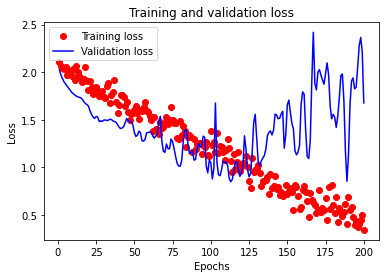

In [12]:
### loss plots using LSTM model
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'ro', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

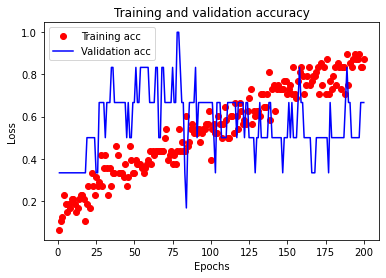

In [13]:
### accuracy plots using LSTM model
plt.clf()                                                

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'ro', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

*  **(evaluate function): Returns the loss value & metrics values for the model in test mode.**

In [14]:
### evaluate using model A
model_A.evaluate(np.expand_dims(ravdess_speech_data_array[training_samples + validation_samples:], -1), labels_categorical[training_samples + validation_samples:])

1/1 [==============================] - 0s 18ms/step - loss: 1.3686 - accuracy: 0.5000


[1.3686350584030151, 0.5]

* **  Save the weights of the model as a HDF5 file **

In [15]:
model_A.save_weights("Model_LSTM.h5")

In [16]:
# path_ = '../input/ravdess-emotional-speech-audio/Actor_01/03-01-01-01-01-02-01.wav'
path_ = './dataset/Actor_01/03-01-01-01-01-02-01.wav'

In [17]:
import IPython.display as ipd
ipd.Audio(path_)

In [18]:
a = extract_mfcc(path_)

In [19]:
a.shape

(40,)

In [20]:
a1 = np.asarray(a)

In [21]:
a1.shape

(40,)

In [22]:
q = np.expand_dims(a1,-1)

In [23]:
qq = np.expand_dims(q,0)

In [24]:
qq.shape

(1, 40, 1)

In [25]:
pred = model_A.predict(qq)

In [26]:
pred

array([[1.1990627e-02, 9.6449625e-01, 8.4808916e-03, 1.4774055e-02,
        3.1175094e-07, 1.8197327e-04, 3.0954870e-06, 7.2644405e-05]],
      dtype=float32)

In [27]:
preds=pred.argmax(axis=1)
preds
# data = lb.inverse_transform(preds)

array([1])

In [28]:
# 0 = neutral, 1 = calm, 2 = happy, 3 = sad, 4 = angry, 5 = fearful, 6 = disgust, 7 = surprised
